Loading MNIST dataset...
Original dataset shape: (70000, 784)


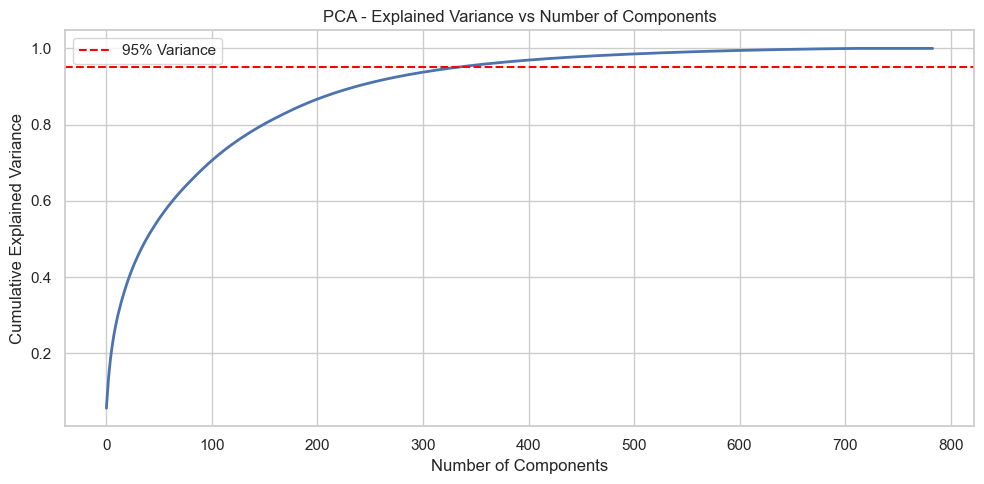

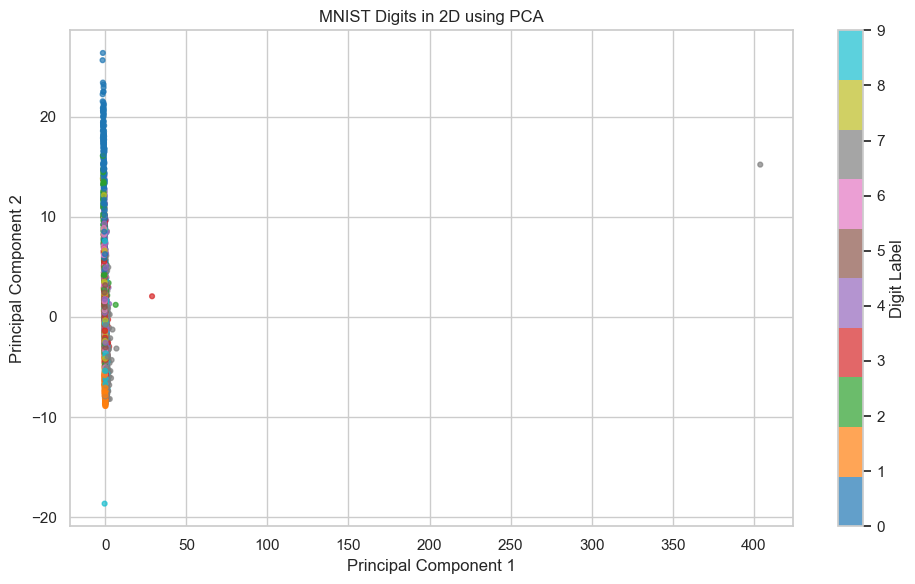

In [4]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Set seaborn style
sns.set(style='whitegrid')

# -----------------------------
# Step 1: Load MNIST dataset from openml
# -----------------------------
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

print(f"Original dataset shape: {X.shape}")  # (70000, 784)

# -----------------------------
# Step 2: Scale the data
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# Step 3: PCA for Explained Variance Analysis
# -----------------------------
pca_full = PCA().fit(X_scaled)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot how many components explain 95% of the variance
plt.figure(figsize=(10, 5))
plt.plot(explained_variance, linewidth=2)
plt.axhline(y=0.95, color='red', linestyle='--', label='95% Variance')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance vs Number of Components")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# -----------------------------
# Step 4: Reduce to 2D using PCA and visualize
# -----------------------------
# For performance, use only the first 3000 samples
X_small = X_scaled[:3000]
y_small = y[:3000]

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_small)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_small, cmap='tab10', s=12, alpha=0.7)
plt.colorbar(scatter, label='Digit Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("MNIST Digits in 2D using PCA")
plt.grid(True)
plt.tight_layout()
plt.show()
